In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [38]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [39]:
train_data.shape

(25000,)

In [40]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)

In [41]:
x_train.shape

(25000, 10000)

In [42]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [43]:
y_train.shape

(25000,)

In [44]:
model = keras.Sequential([
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [45]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [46]:
x_val = x_train[:5000]
x_train = x_train[5000:]
y_val = y_train[:5000]
y_train = y_train[5000:]

In [47]:
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/4
79/79 [==============================] - 3s 28ms/step - loss: 0.4422 - accuracy: 0.8302 - val_loss: 0.3561 - val_accuracy: 0.8480
Epoch 2/4
79/79 [==============================] - 1s 18ms/step - loss: 0.2465 - accuracy: 0.9119 - val_loss: 0.2888 - val_accuracy: 0.8826
Epoch 3/4
79/79 [==============================] - 1s 15ms/step - loss: 0.1889 - accuracy: 0.9327 - val_loss: 0.2736 - val_accuracy: 0.8930
Epoch 4/4
79/79 [==============================] - 1s 19ms/step - loss: 0.1555 - accuracy: 0.9449 - val_loss: 0.2861 - val_accuracy: 0.8902


In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

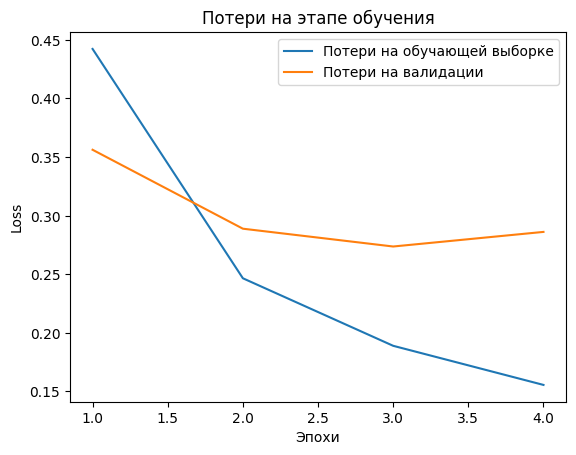

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.figure()
sns.lineplot(x=epochs, y=train_loss, label="Потери на обучающей выборке")
sns.lineplot(x=epochs, y=val_loss, label="Потери на валидации")
plt.title("Потери на этапе обучения")
plt.xlabel("Эпохи")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

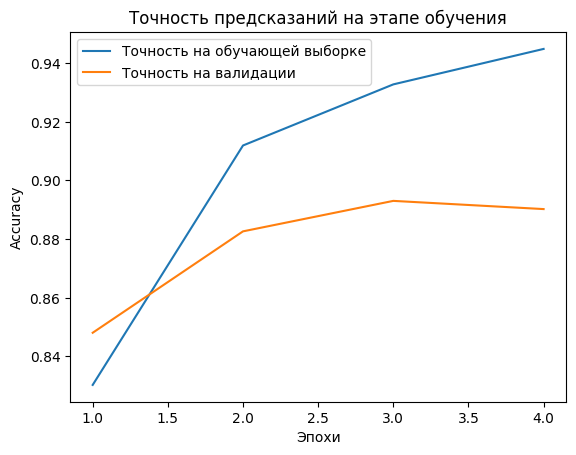

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
train_acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(train_loss) + 1)
plt.figure()
sns.lineplot(x=epochs, y=train_acc, label="Точность на обучающей выборке")
sns.lineplot(x=epochs, y=val_acc, label="Точность на валидации")
plt.title("Точность предсказаний на этапе обучения")
plt.xlabel("Эпохи")
plt.ylabel("Accuracy")

In [51]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3069 - accuracy: 0.8802


[0.3068976402282715, 0.8801599740982056]